In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy.linalg import inv

In [4]:
D = 100
t = np.linspace(0, 20, D + 1)

In [39]:
L = np.zeros((D - 2, D))

for i in range(D - 2):
    j = i
    L[i, j] = -1
    L[i, j + 1] = 2
    L[i, j + 2] = -1
    
L *= 0.5
L

array([[-0.5,  1. , -0.5, ...,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5, ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  1. , -0.5,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  1. , -0.5]])

In [40]:
lmbda = 0.0001

In [41]:
Sigma = lmbda * inv(L.T.dot(L))
x = stats.multivariate_normal.rvs(cov = Sigma, size = 1)
x

array([-990985.64114361, -981399.24098115, -971812.8985112 ,
       -962226.06555996, -952639.84073423, -943053.06081387,
       -933466.62506586, -923880.15102841, -914293.51490296,
       -904707.17235286, -895120.50923867, -885534.24430504,
       -875947.54557843, -866361.09760682, -856774.74139644,
       -847188.10270758, -837601.62717712, -828015.08647352,
       -818428.75548759, -808842.3377444 , -799255.81661655,
       -789669.50923663, -780082.96049295, -770496.45493666,
       -760909.99055091, -751323.63388384, -741737.11869366,
       -732150.5933051 , -722564.13827454, -712977.6957186 ,
       -703391.17689157, -693804.4516155 , -684218.04700646,
       -674631.6248467 , -665044.91621367, -655458.53070553,
       -645872.03640862, -636285.50044737, -626698.85270293,
       -617112.47645201, -607525.94281767, -597939.63746531,
       -588353.05597562, -578766.5872199 , -569180.1293041 ,
       -559593.68728274, -550007.20929422, -540420.78809943,
       -530834.41938914,

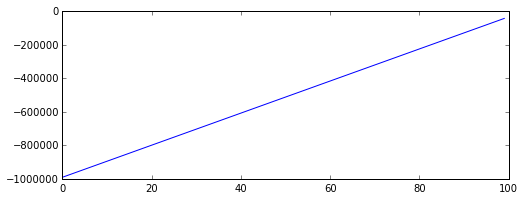

In [42]:
plt.figure(figsize = (8, 3))
plt.plot(x)
plt.show()